In [1]:
import msprime
import dadi
import numpy as np
import util
import random
from IPython.display import SVG, display
import pickle

In [2]:
sys.path.append(os.path.join(os.getcwd(), '../../ml_dadi')) # this is the ml_dadi dir
import plotting
from plotting import plot_by_param_4x4, plot_by_param_2x2, plot_accuracy_multi

In [92]:
s1 = 5_000
ns = 10
ploidy = 2
seq_l = 2_000
recomb = 1e-3
mut = 1e-3

In [93]:
params_random = []
while len(params_random) < 100: 
# generate random nu and T within the same range as training data range
    nu = random.random() * 4 - 2
    T = random.random() * 1.9 + 0.1
    # exclude T/nu > 5
    if T/10**nu <= 5:
        ms_params = (nu, T)
        params_random.append(ms_params)
# len(params_random)

In [94]:
dem_list_random = [util.msprime_two_epoch(s1, p) for p in params_random]

In [95]:
params_grid = [(nu,T) for nu in np.linspace(-2, 2, 15)
                      for T in np.linspace(0.1, 2, 10) if T/10**nu <= 5]
# len(params_grid)

In [96]:
dem_list_grid = [util.msprime_two_epoch(s1, p) for p in params_grid]

In [97]:
msprime_test_dict_random = util.msprime_generate_data_parallel(params_random, dem_list_random, ns, ploidy, seq_l, recomb, mut)

In [103]:
pickle.dump(msprime_test_dict_random, open('msprime_test_dict_random', 'wb'), 2)

In [98]:
msprime_test_dict_grid = util.msprime_generate_data_parallel(params_grid, dem_list_grid, ns, ploidy, seq_l, recomb, mut)

In [104]:
pickle.dump(msprime_test_dict_grid, open('msprime_test_dict_grid', 'wb'), 2)

In [99]:
# load list of train rfr
list_rfr = pickle.load(open('../../ml_dadi/1d_2epoch/data/new_log/list_rfr_exclude_log','rb'))
# load list of trained mlpr with lbfgs solver
list_mlpr_lbfgs = pickle.load(open('../../ml_dadi/1d_2epoch/data/new_log/list_mlpr_exclude_log_lbfgs','rb'))
# load list of trained mlpr with adam solver
list_mlpr_adam = pickle.load(open('../../ml_dadi/1d_2epoch/data/new_log/list_mlpr_exclude_log_adam','rb'))

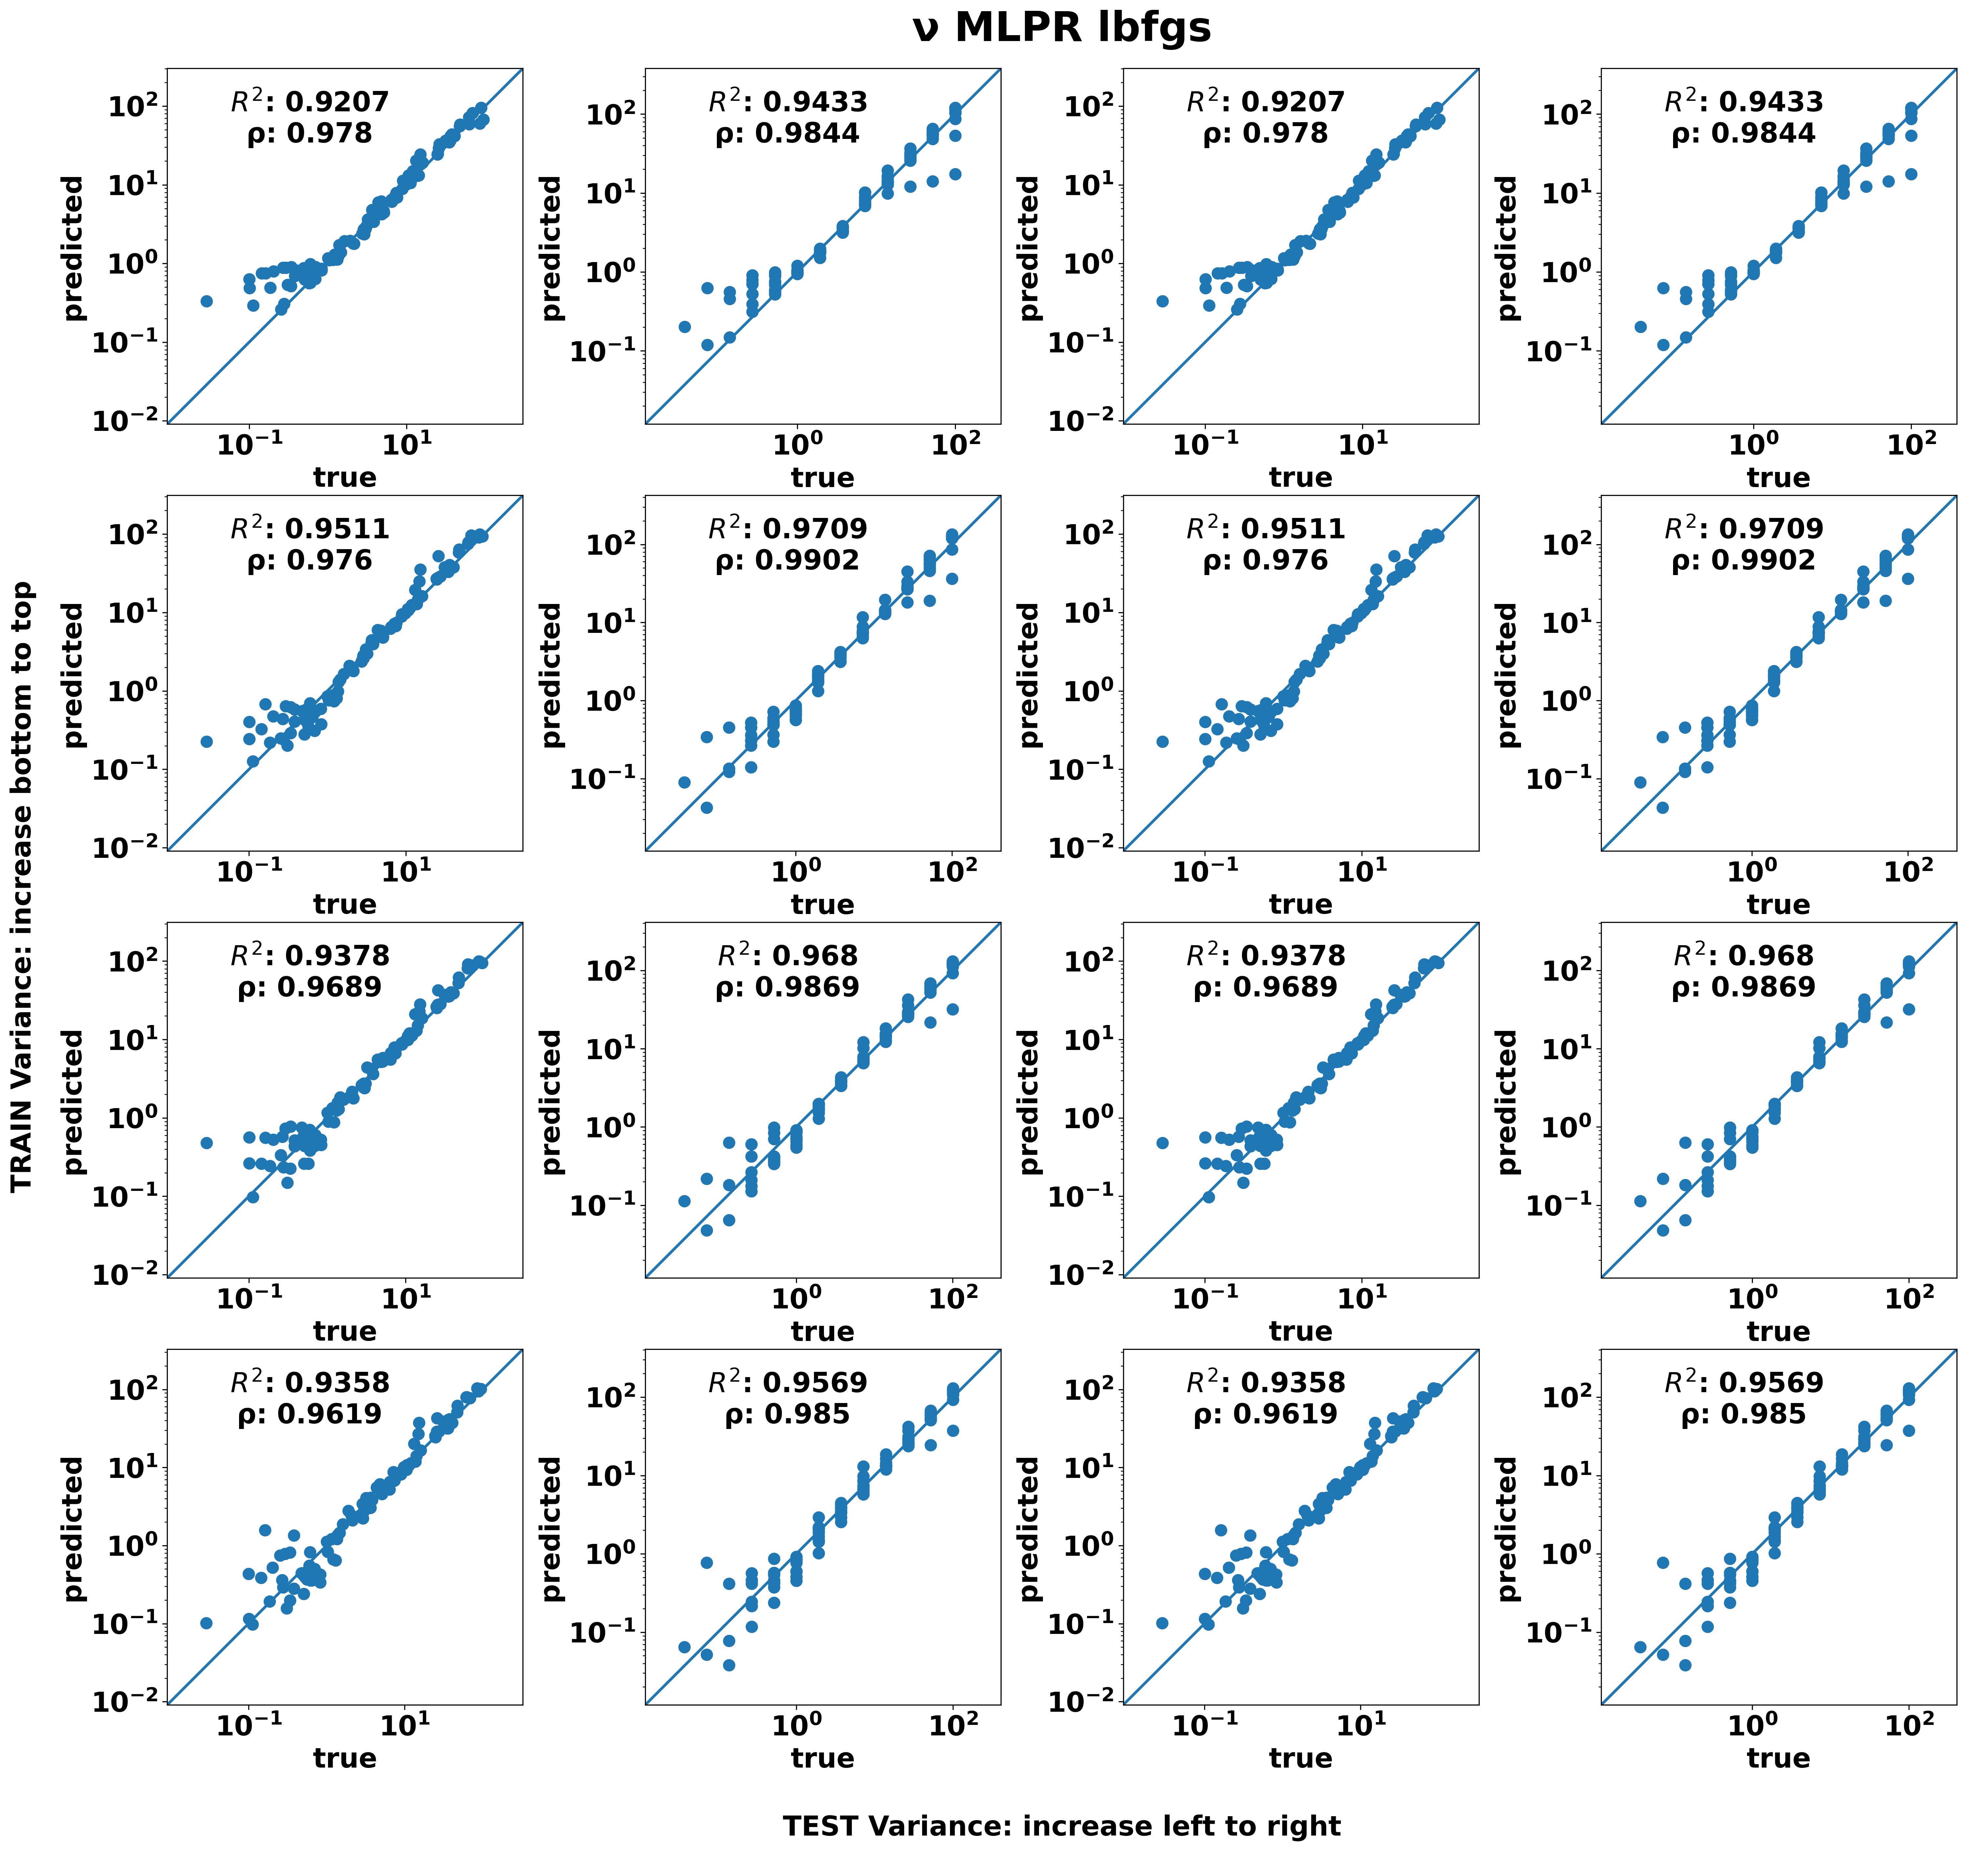

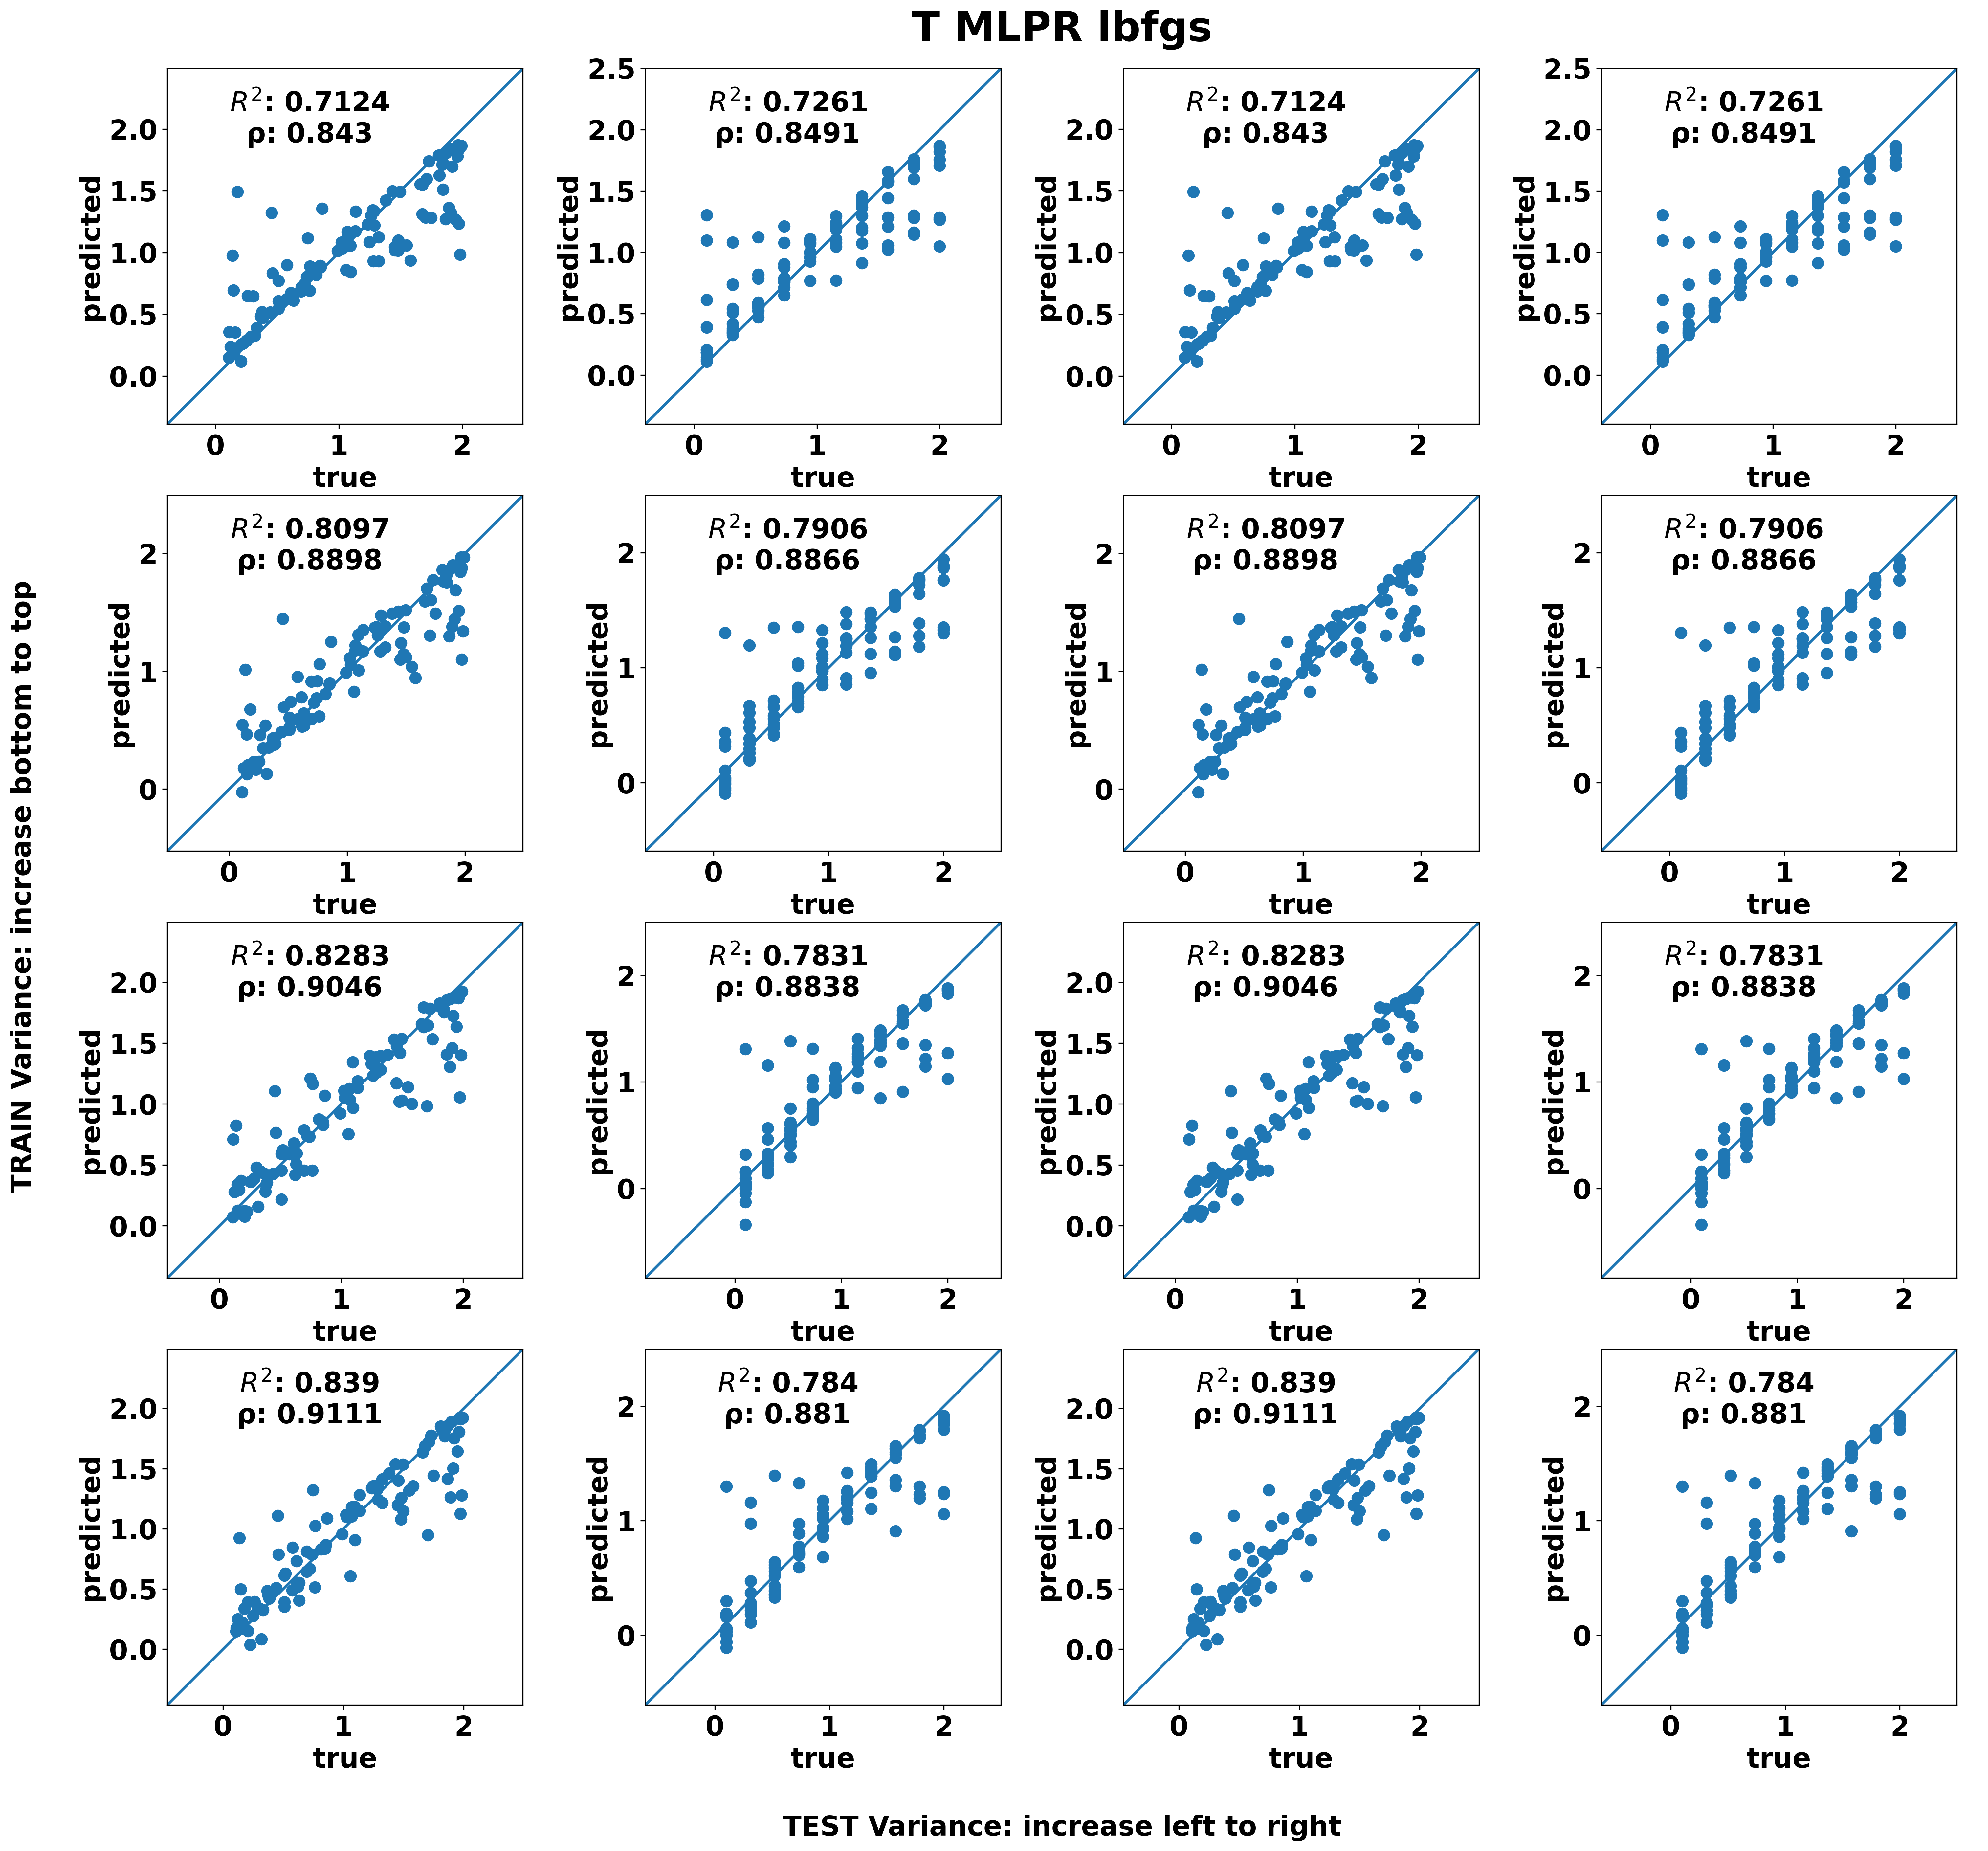

In [100]:
# Plot 4x4 MLPR lbfgs
params = ['ν','T']
model_name = 'MLPR lbfgs'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
list_test_dict = [msprime_test_dict_random, msprime_test_dict_grid,
                    msprime_test_dict_random, msprime_test_dict_grid]
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_mlpr_lbfgs, list_test_dict, params, model_name, logs, size)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

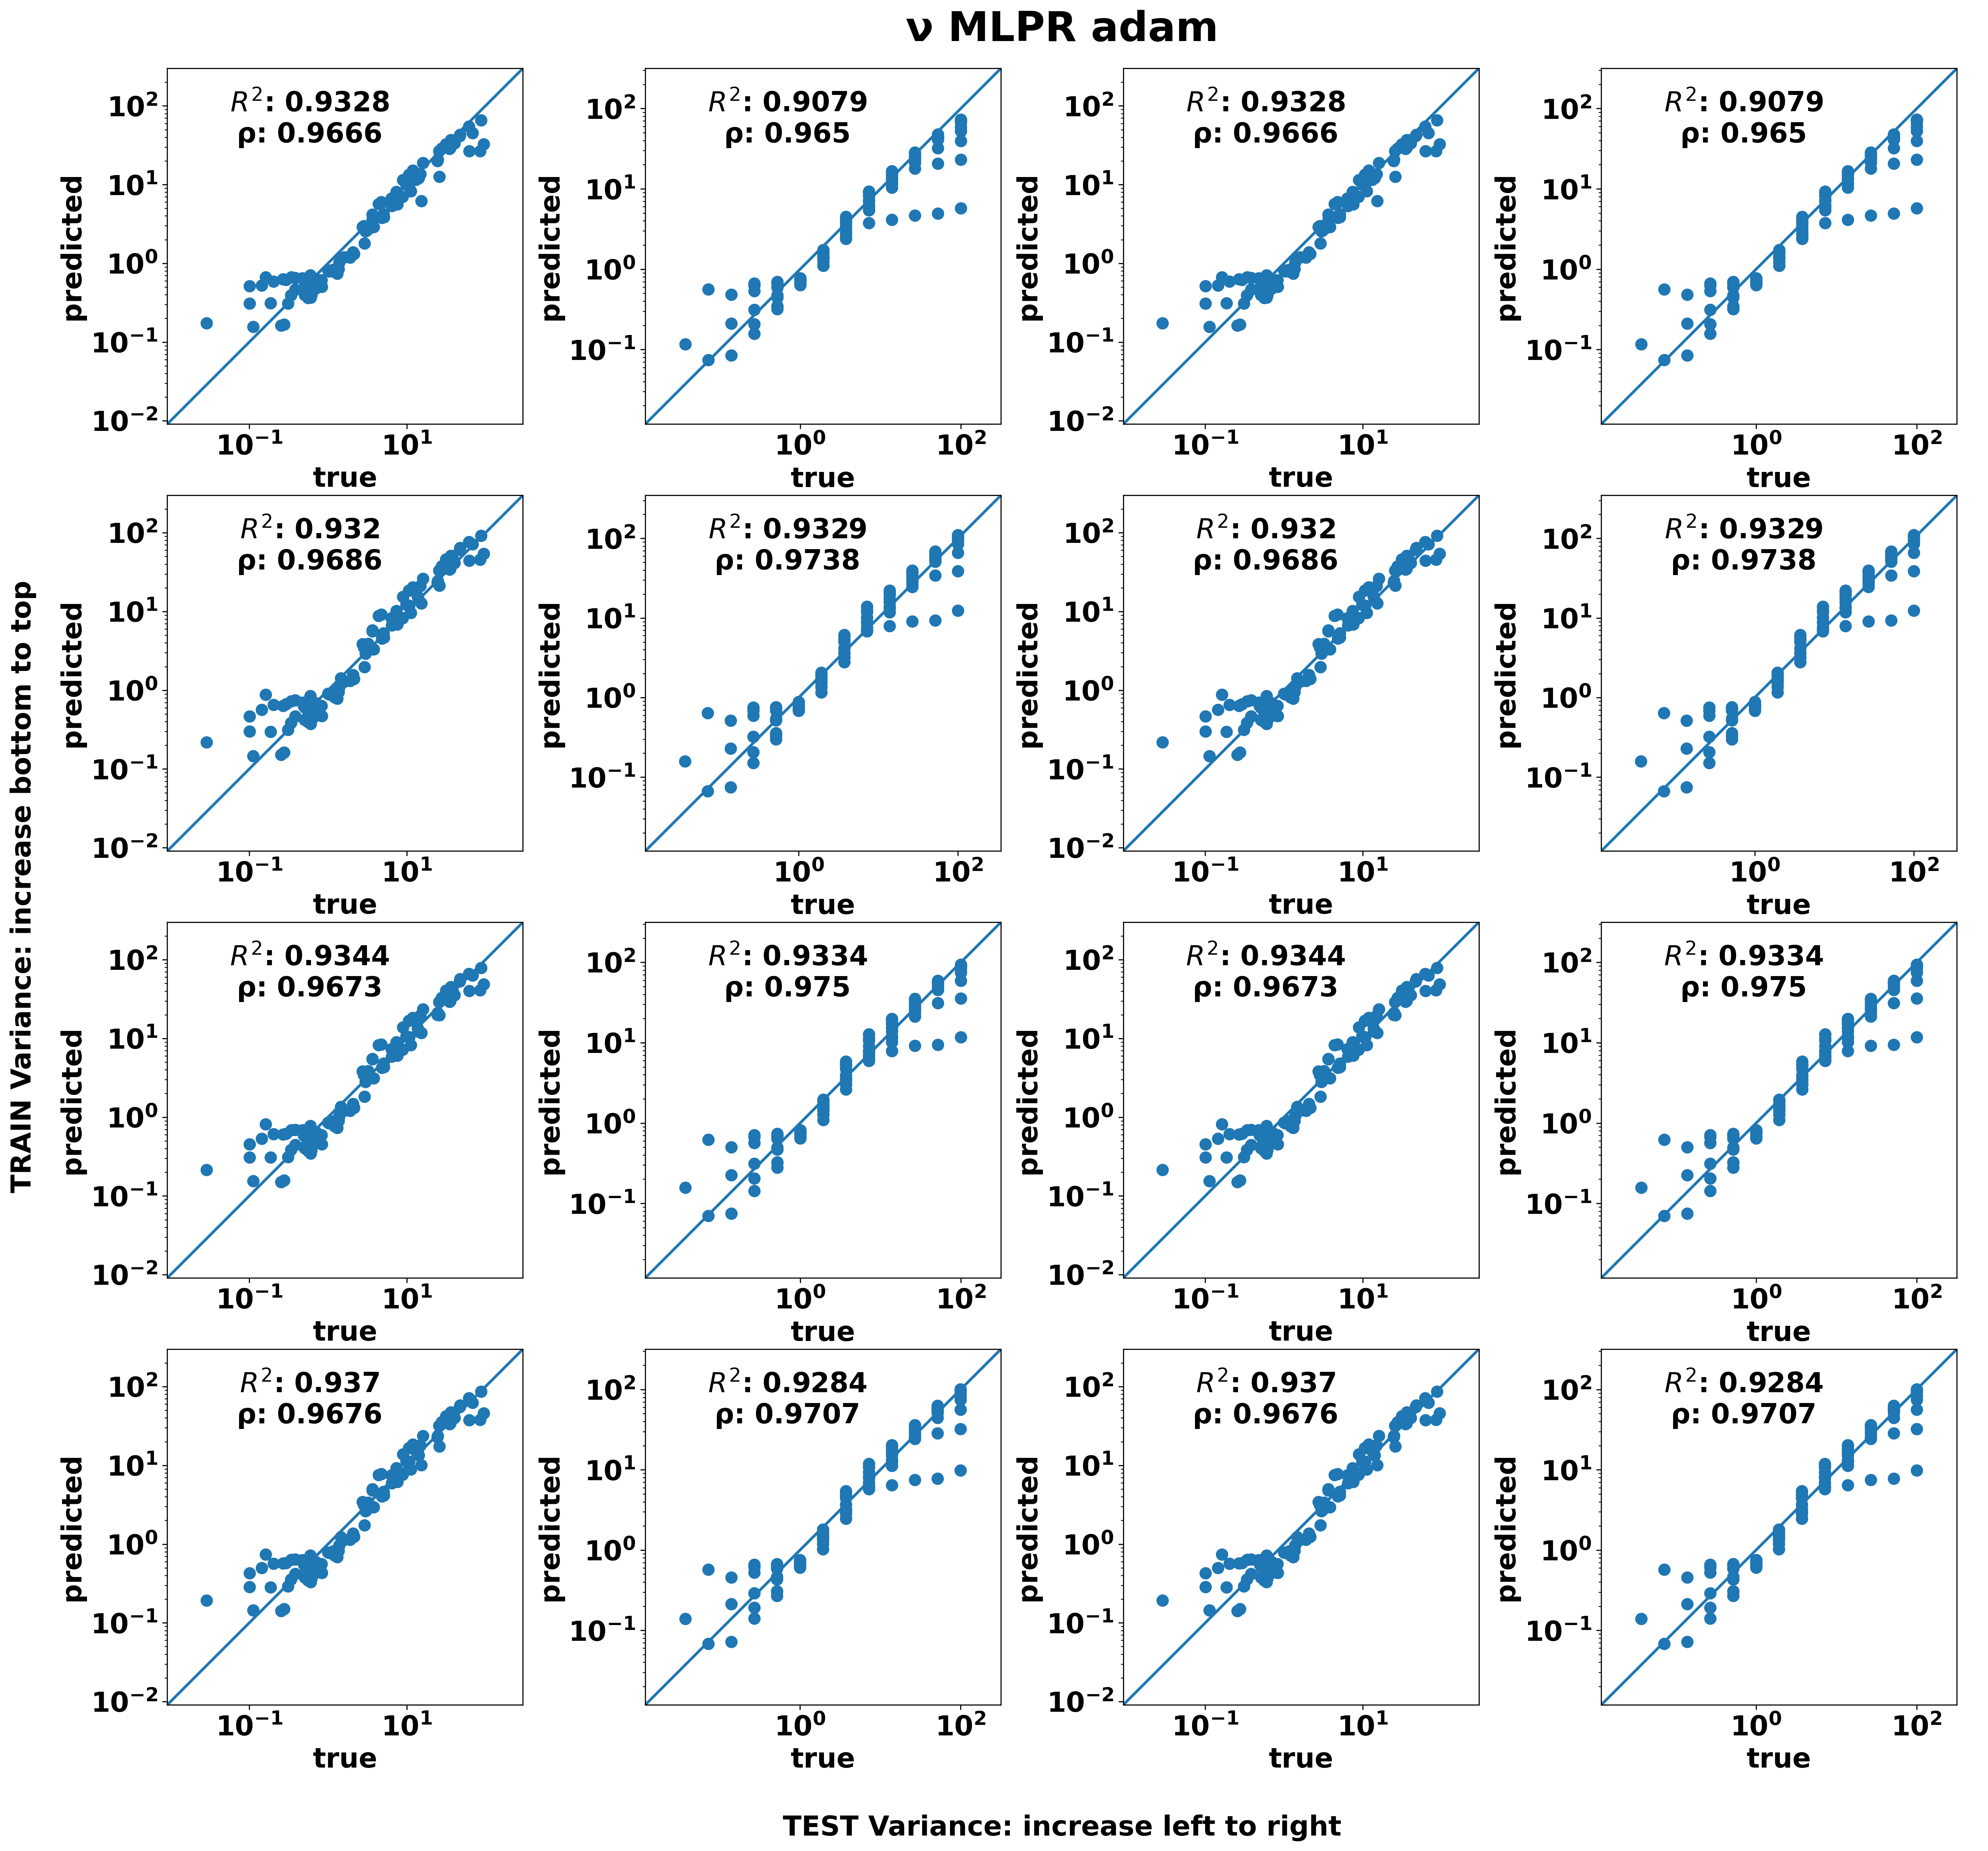

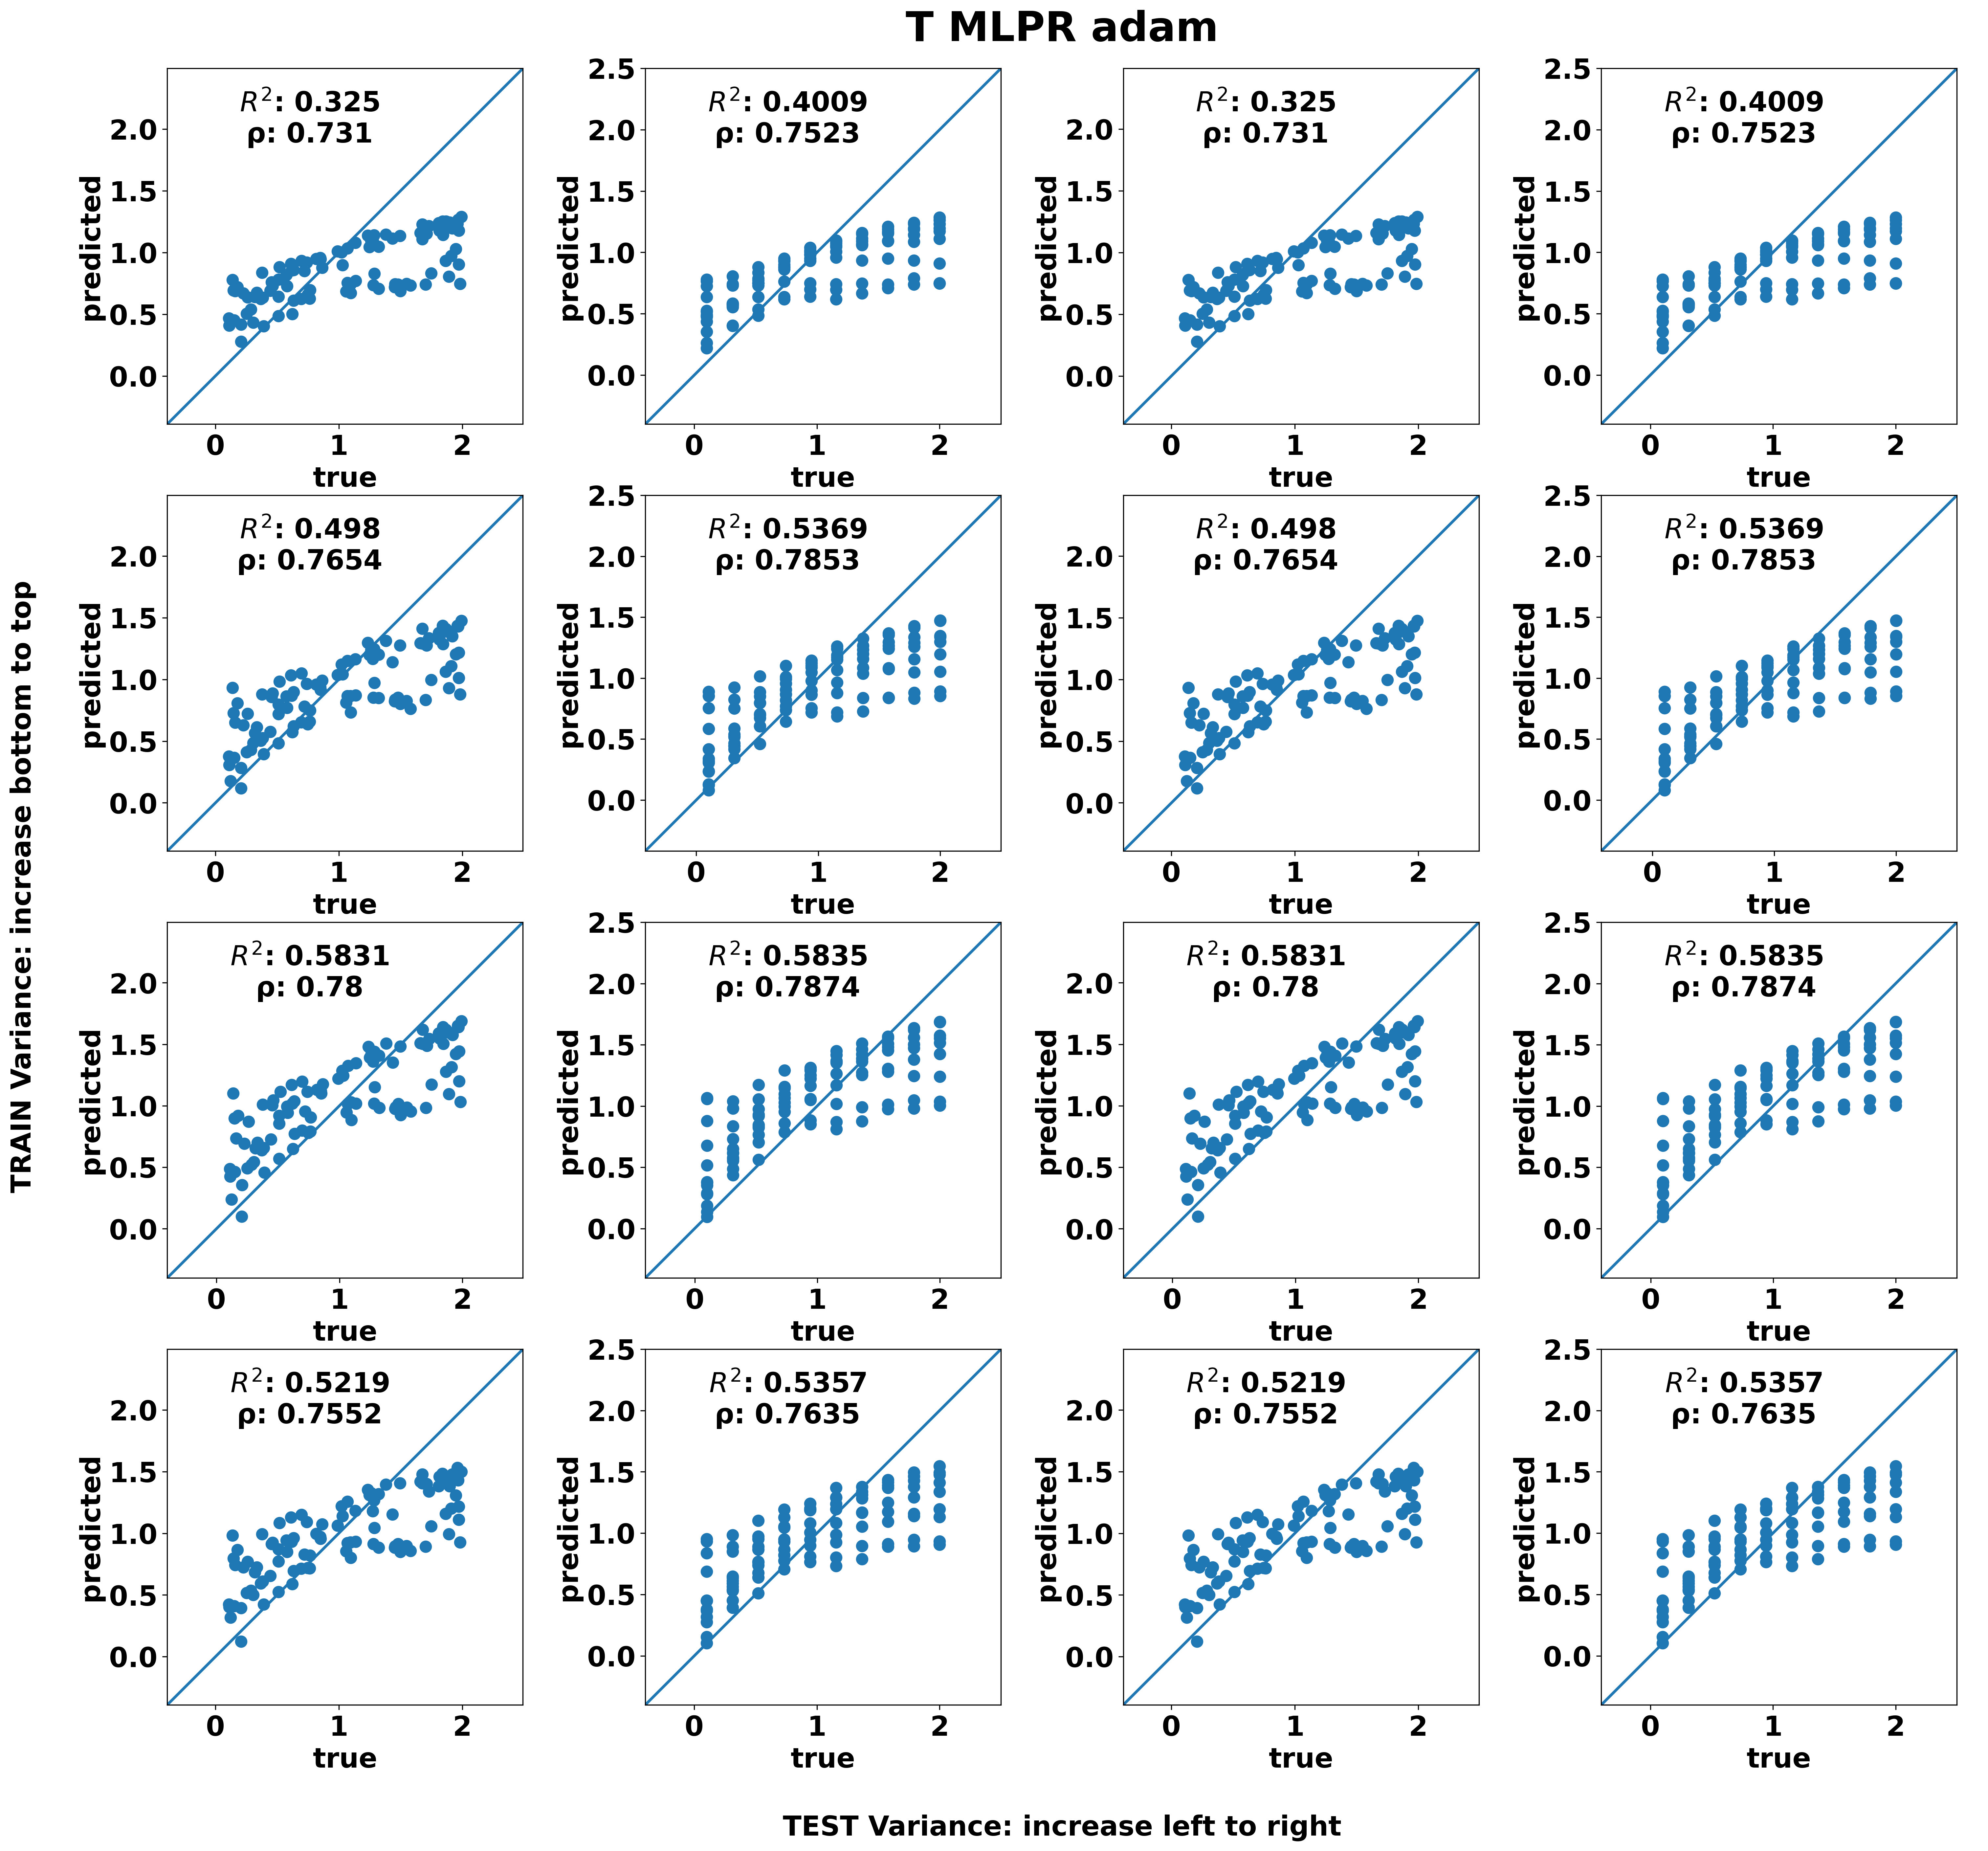

In [101]:
# Plot 4x4 MLPR adam
params = ['ν','T']
model_name = 'MLPR adam'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
list_test_dict = [msprime_test_dict_random, msprime_test_dict_grid,
                    msprime_test_dict_random, msprime_test_dict_grid]
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_mlpr_adam, list_test_dict, params, model_name, logs, size)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

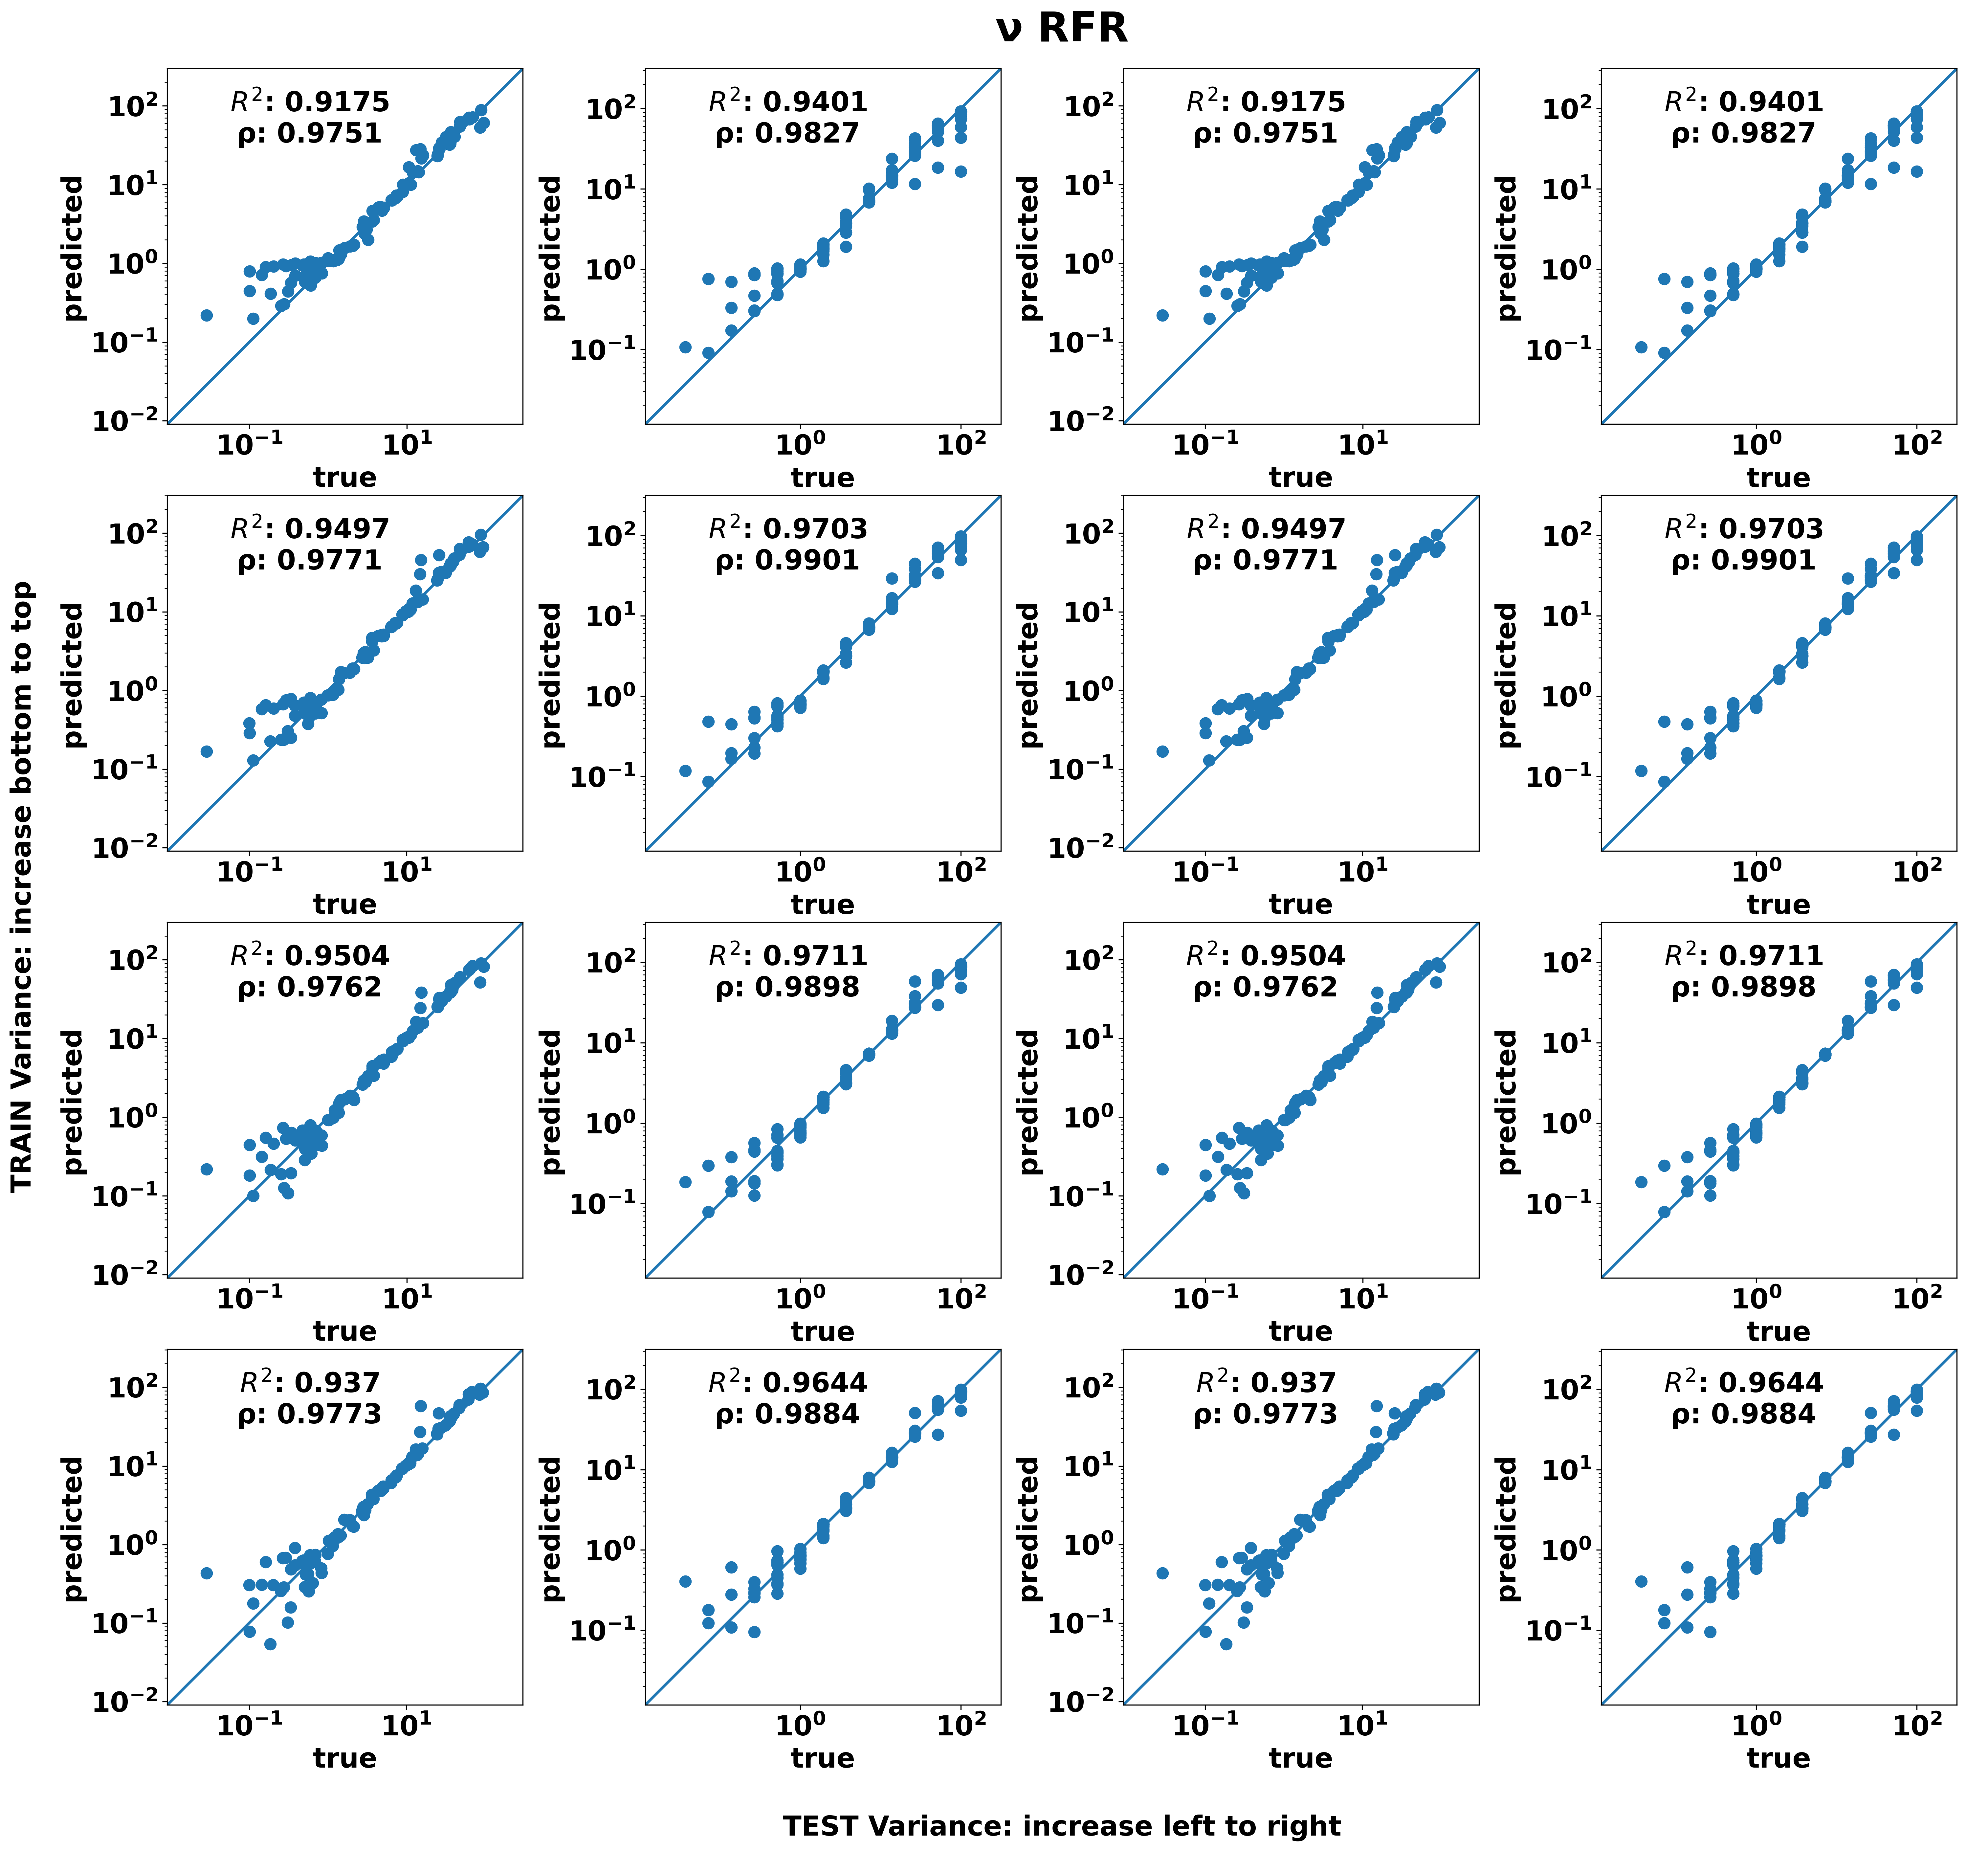

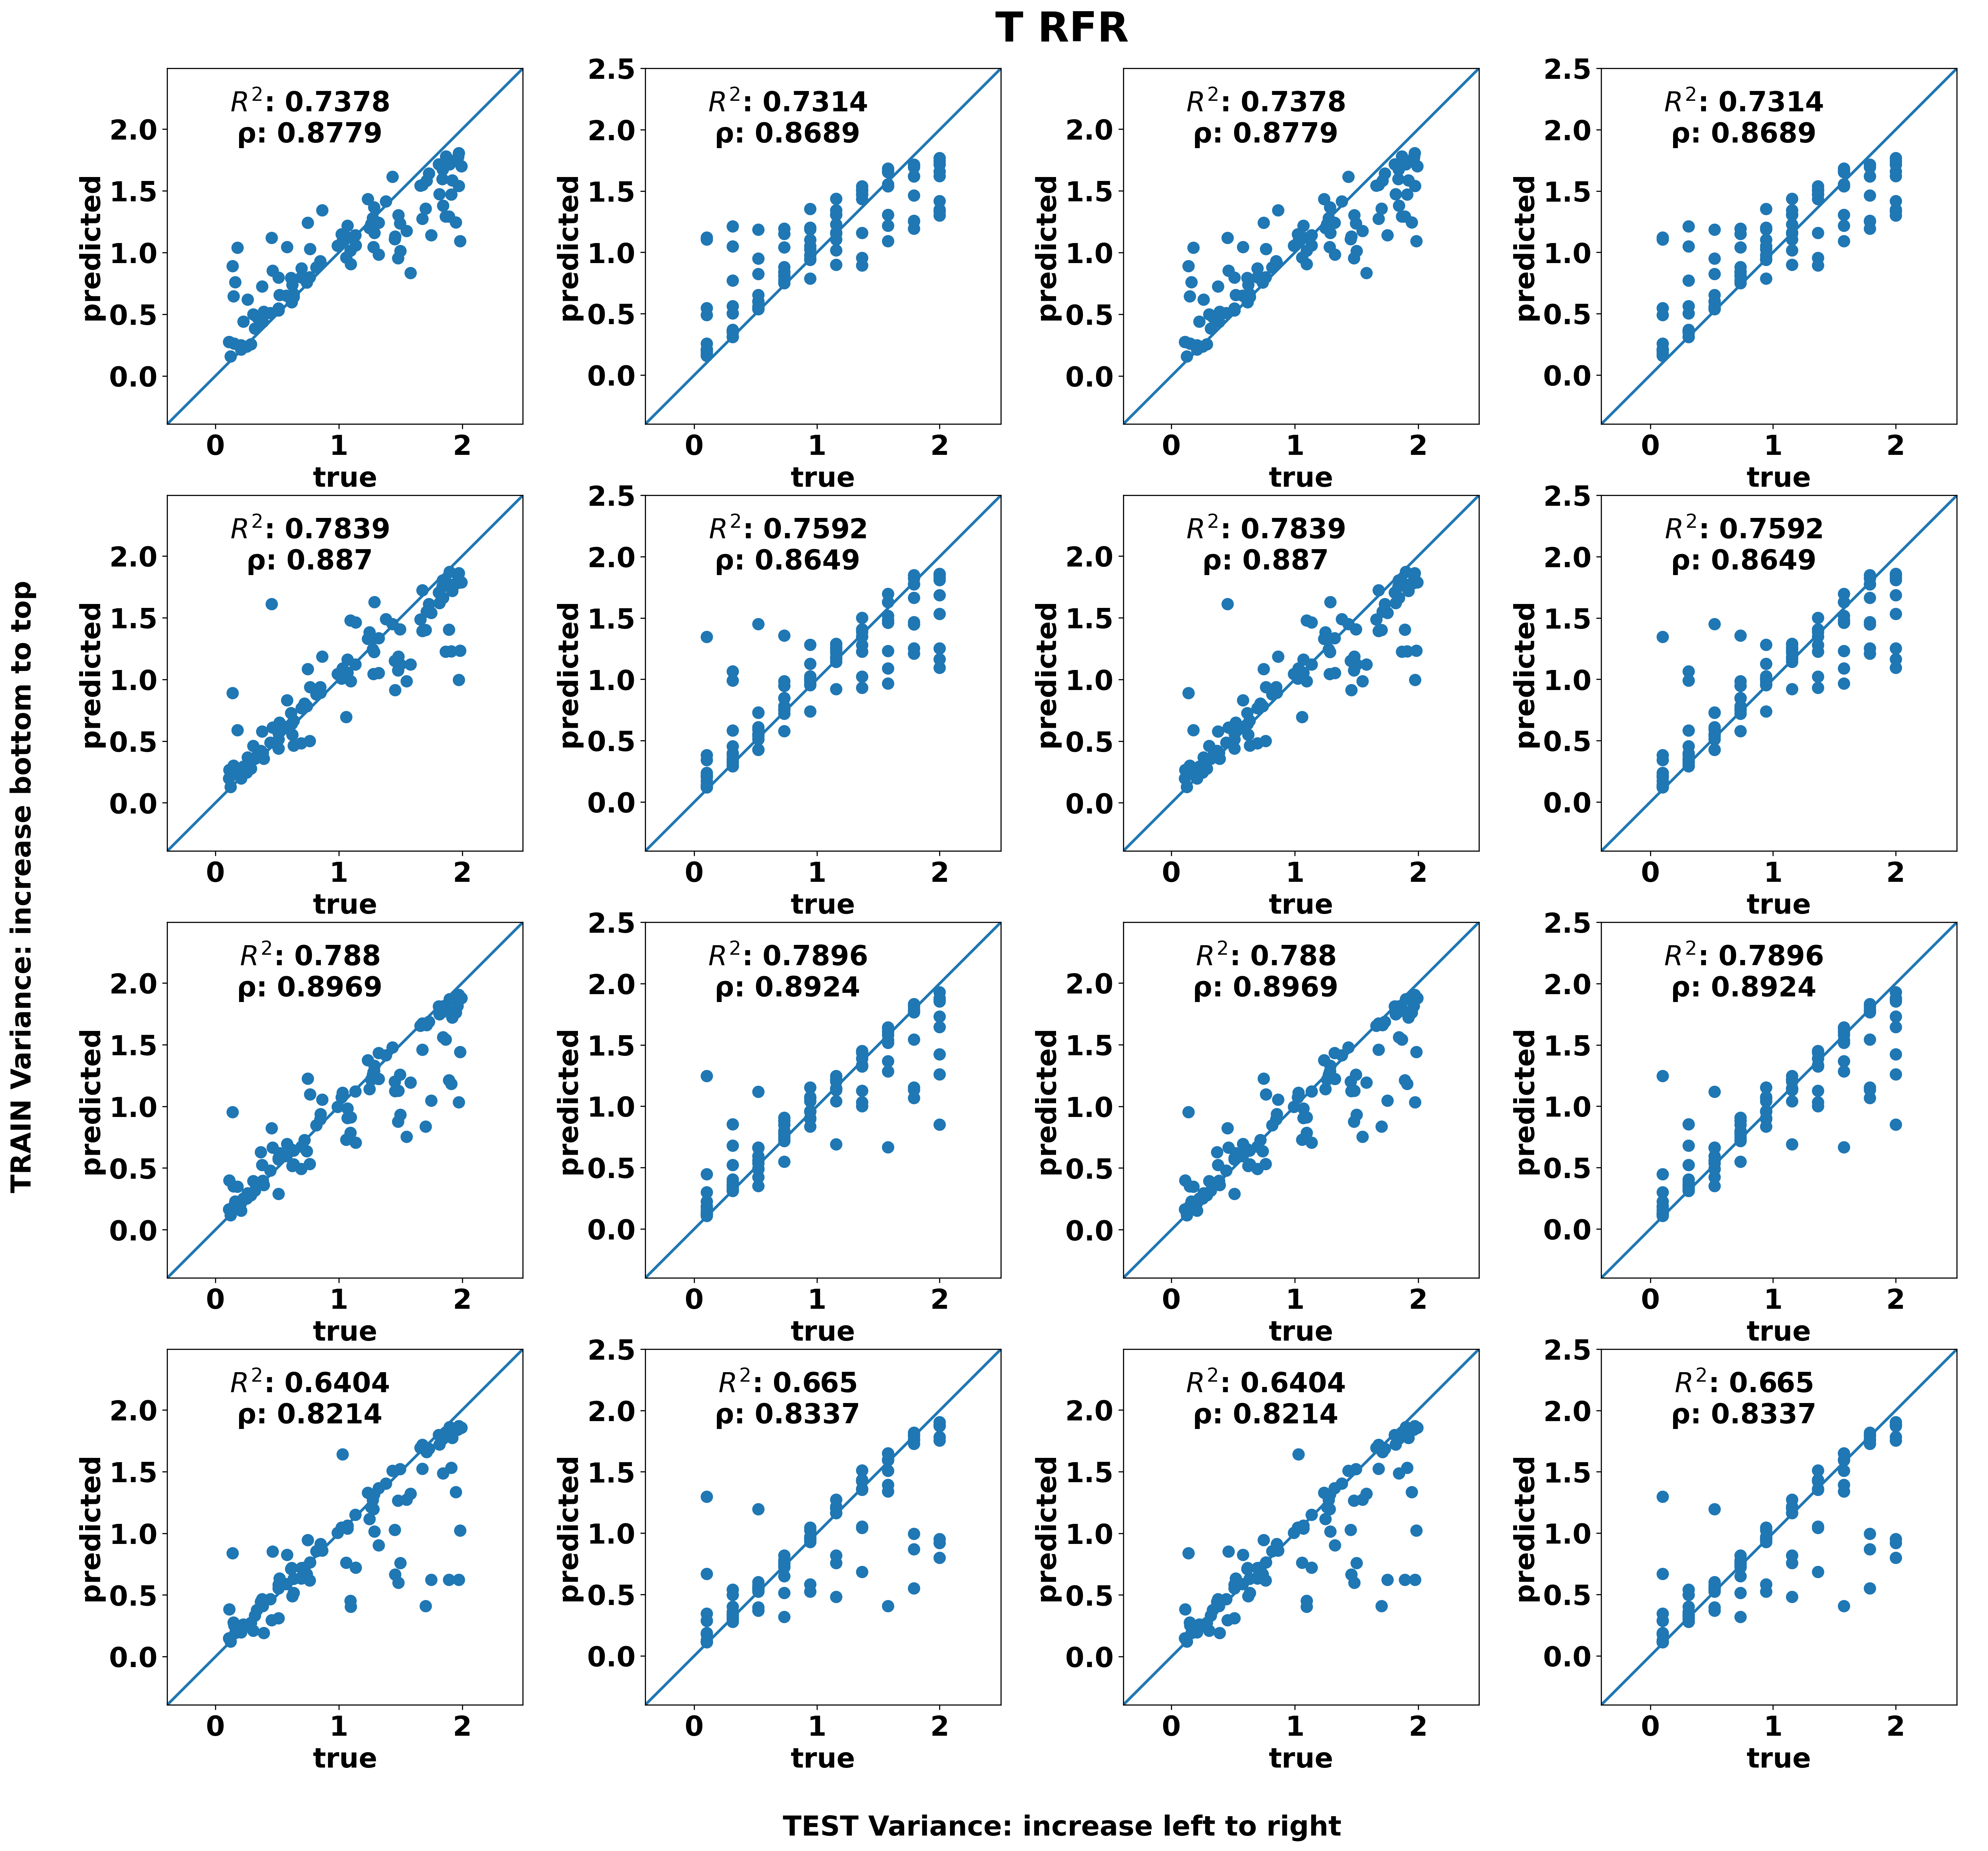

In [102]:
# Plot 4x4 RFR
params = ['ν','T']
model_name = 'RFR'
logs = [True, False]
size = ((30, 20), (20, 80), (8,2,20), (24,22))
list_test_dict = [msprime_test_dict_random, msprime_test_dict_grid,
                    msprime_test_dict_random, msprime_test_dict_grid]
# size_format = ( (title_font_size, title_pad), (axis_font_size, axis_pad),
#                   (single_size_tuple), fig_size)
# single_size_tuple = (dots_size, line_width, font_size)
plot_accuracy_multi(list_rfr, list_test_dict, params, model_name, logs, size)
# save fig
# for i in range(len(params)):
#     plt.figure(i+1).savefig(f'results/{model_name}/{params[i]}_4x4.png')

In [105]:
params_grid_shortened = [params_grid[i] for i in range(0,102,10)]
msprime_test_dict_grid_shortened = {}
for p in params_grid_shortened:
    msprime_test_dict_grid_shortened[p] = msprime_test_dict_grid[p]

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot 

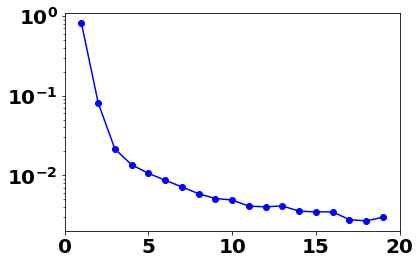

In [111]:
import matplotlib.pyplot as plt
for item in msprime_test_dict_grid_shortened:
    dadi.Plotting.plot_1d_fs(msprime_test_dict_grid_shortened[item])
    plt.savefig(f'{item}.png')

(-1.4285714285714286, 0.1)


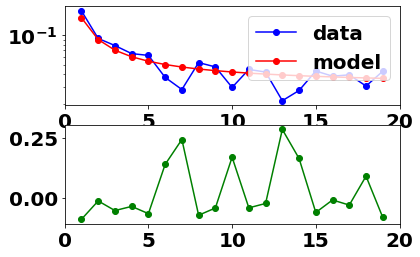

(-0.5714285714285716, 0.9444444444444444)


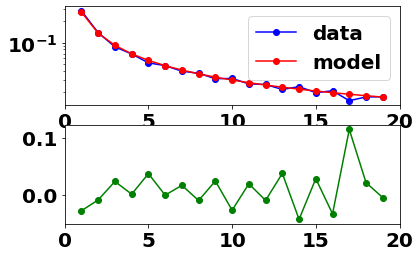

(-0.2857142857142858, 1.788888888888889)


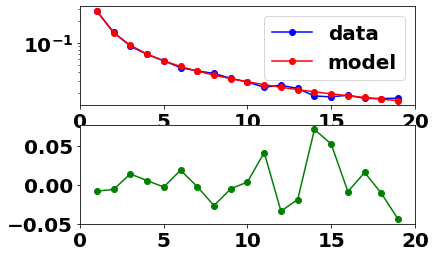

(0.0, 1.788888888888889)


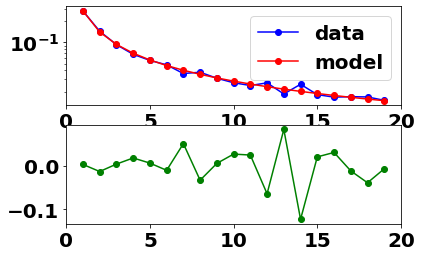

(0.2857142857142856, 1.788888888888889)


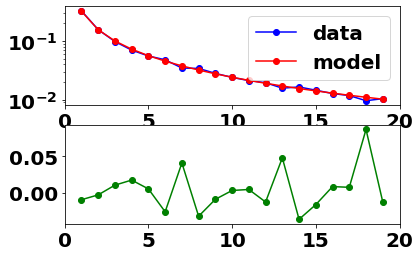

(0.5714285714285712, 1.788888888888889)


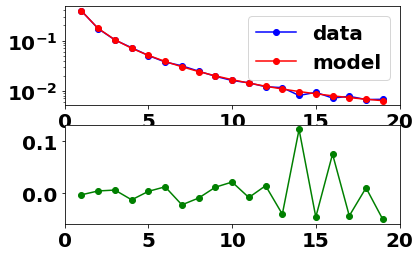

(0.8571428571428568, 1.788888888888889)


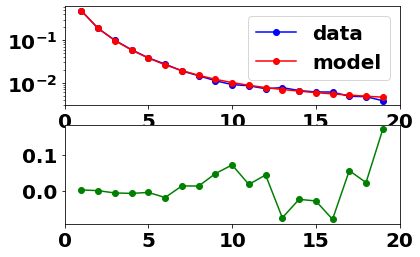

(1.1428571428571428, 1.788888888888889)


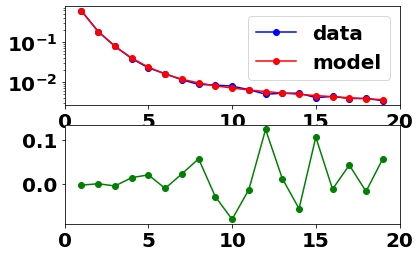

(1.4285714285714284, 1.788888888888889)


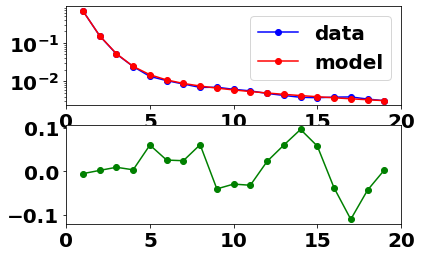

(1.714285714285714, 1.788888888888889)


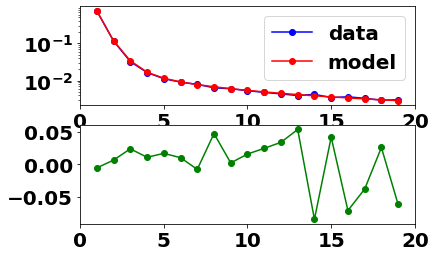

(2.0, 1.788888888888889)


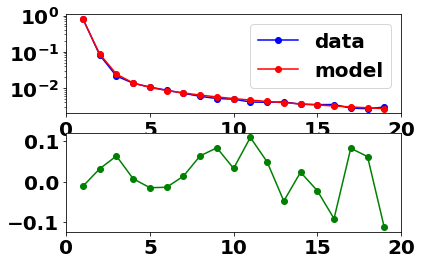

In [112]:
func = dadi.Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_func(func)
ns = [20,]
pts_l = [40, 50, 60]

for item in msprime_test_dict_grid_shortened:
    log_p = (10**item[0], item[1])
    model = func_ex(log_p, ns, pts_l)
    data = msprime_test_dict_grid_shortened[item]
    print(item)
    dadi.Plotting.plot_1d_comp_multinom(model, data)

In [85]:
# Try a one population two-epoch model: instantaneous size change some time,
# ago in the past
dem = msprime.Demography()
# dem.add_population(initial_size=10_000)
# dem.add_population_parameters_change(time=19000, initial_size=5_000)
# Simulate
# ts = msprime.sim_ancestry(samples=20, ploidy=1, demography=dem, 
#                             sequence_length=5_000, 
#                             recombination_rate=1e-4)

# Bottleneck in Pop at T=0.475 => 0.475*4*Na = 950 gen ago.
# (instantaneous); nu=0.5
# dem.add_population(initial_size=500)
# dem.add_population_parameters_change(time=950, initial_size=5)
# ts = msprime.sim_ancestry(samples=20, ploidy=1, demography=dem, 
#                             sequence_length=5_000, 
#                             recombination_rate=1e-2)

dem.add_population(initial_size=5_000*0.01)
dem.add_population_parameters_change(time=5_000*2*0.475, 
                                        initial_size=5_000)
ts = msprime.sim_ancestry(samples=10, ploidy=2, demography=dem, 
                            sequence_length=2_000, 
                            recombination_rate=1e-3)
# SVG(ts.draw_svg())

In [51]:
dem.debug()

In [ ]:
# Adding mutation to produce genetic variation data
# mts = msprime.sim_mutations(ts, rate=1e-5) 
                                    #, discrete_genome=False)

In [86]:
# Higher mutation rate for smaller population
mts = msprime.sim_mutations(ts, rate=1e-3, discrete_genome=False)

In [87]:
# check total number of mutations
mts.num_mutations

1432

In [88]:
afs = mts.allele_frequency_spectrum(polarised=True, span_normalise=False)
# span_normalise=False: by default, windowed statistics are divided by the 
# sequence length, so they are comparable between windows.

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

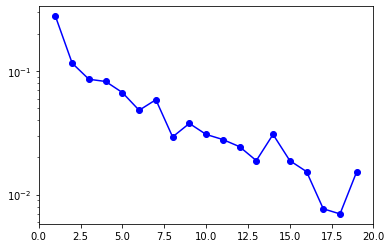

In [89]:
fs = dadi.Spectrum(afs)
fs_norm = fs/fs.sum()
dadi.Plotting.plot_1d_fs(fs_norm)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

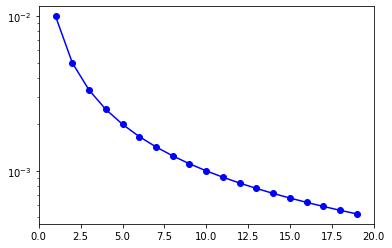

In [90]:
# compare with a dadi-simulated spectrum
func = dadi.Demographics1D.two_epoch
func_ex = dadi.Numerics.make_extrap_func(func)
ns = [20,]
pts_l = [40, 50, 60]
param = (0.01, 0.475)
fs_dadi = func_ex(param, ns, pts_l)
dadi.Plotting.plot_1d_fs(fs_dadi)

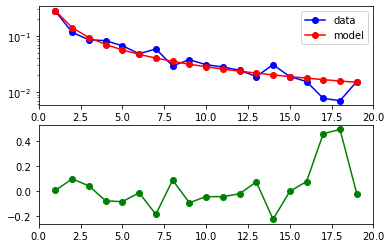

In [91]:
dadi.Plotting.plot_1d_comp_multinom(fs_dadi, fs_norm)

In [ ]:
# # export tree sequence file to vcf then load into dadi using VCF parser
# with open("output.vcf", "w") as vcf_file:
#     mts.write_vcf(vcf_file)
# # Parse the VCF file to generate a data dictionary
# datafile = 'output.vcf'
# dd = dadi.Misc.make_data_dict_vcf(datafile, 'vcf.txt')
# pop_ids, ns = ['POP1'], [4]
# fs = dadi.Spectrum.from_data_dict(dd, pop_ids, ns, polarized=False)